In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [2]:
# Open the dataset file
raw_data = pd.read_csv('shuffle_email_spam_classification.csv')
pd.set_option('display.max_columns', None)
raw_data.sample(5)

Email No.  the  to  ect  and  for  of    a  you  hou  in  on  is  this  \
4656  Email 4657    0   2    3    5    1   2   34    1    2   5   4   4     0   
1598  Email 1599    5   2    2    0    0   1   13    0    0   0   0   1     0   
3814  Email 3815    0   3    2    0    2   0   15    0    0   1   7   1     0   
4972  Email 4973    3   1    1    0    0   0   19    1    1   3   5   2     1   
17      Email 18   36  21    6   14    7  17  194   25    5  59  37  16     5   

      enron    i  be  that  will  have  with  your  at  we    s  are  it  by  \
4656      0   26   2     0     0     0     0     0   1   0   24    0   0   1   
1598      0    5   1     0     0     0     0     0   1   1    4    0   1   0   
3814      2   13   1     0     0     0     0     0   1   1   15    0   2   0   
4972      0   14   1     0     0     0     1     1   0   2   21    3   1   1   
17        0  190  17     7     8     2    10    14  31  16  175    6  38   0   

      com  as  from  gas  or  not  me  deal  if  meter  hpl  please  re    e  \
4656    0   3     0    0   3    0   0     0   1      0    0       0   4   34   
1598    0   0     1    0   0    1   0     4   0      0    0       0   1   29   
3814    2   2     0    0   2    0   1     0   0      0    1       0   2   24   
4972    0   4     0    0   4    0   1     0   1      0    0       0   8   43   
17      7  23     2    0  15    2  20     0   3      0    0       1  38  291   

      any  our  corp  can   d  all  has  was  know  need  an  forwarded  new  \
4656    0    2     0    1   9    1    0    0     0     0   9          0    0   
1598    0    0     0    1  10    0    0    0     0     0   2          0    0   
3814    0    0     0    0   4    0    0    0     0     0   0          0    0   
4972    1    1     0    0   9    1    0    0     0     0   2          0    1   
17      3   18     0    0  79   12    2    0     0     1  32          0    0   

        t  may  up  j  mmbtu  should  do  am  get  out  see  no  there  price  \
4656   26    0   0  1      0       0   1   0    0    0    0   2      0      0   
1598   18    0   0  2      0       0   0   0    0    0    0   1      0      0   
3814   19    0   0  3      1       0   0   2    0    0    0   3      0      0   
4972   24    0   0  1      0       0   0   2    0    1    1   2      1      0   
17    236    2   4  4      0       2   2   4    0    2    1   4      0      0   

      daren  but  been  company    l  these  let  so  would   m  into  xls  \
4656      0    0     0        0   15      0    0   1      0   4     0    0   
1598      0    0     0        0    5      0    0   0      0   2     0    0   
3814      0    0     0        0   18      0    0   0      0  11     0    0   
4972      0    0     0        0   11      0    0   2      0  13     0    0   
17        0    0     1        0  112      1    0   7      0  58     2    0   

      farmer  attached  us  information  they  message  day  time  my  one  \
4656       0         0   1            0     0        0    0     0   0    0   
1598       0         0   0            0     0        0    0     0   0    0   
3814       0         0   1            0     0        0    0     0   1    2   
4972       0         0   1            0     0        0    0     0   0    1   
17         0         0  18            0     0        0    0     0   1    3   

      what  only  http  th  volume  mail  contract  which  month  more  \
4656     0     1     2   1       0     0         0      0      0     0   
1598     0     0     0   7       0     0         0      0      0     0   
3814     0     0     0   0       0     0         0      0      0     0   
4972     0     0     0   7       0     1         0      0      0     0   
17       5     0     0  62       0     0         0      1      0     1   

      robert  sitara  about  texas  nom  energy  pec  questions  www  deals  \
4656       0       0      0      0    0       0    0          0    0      0   
1598       0       1      0      0    0       0  

In [3]:
# Check for missing (NAN) values in the columns
missing_values_count = raw_data.isnull().sum().sum()
print("Number of null values troughout the dataset: ", missing_values_count)

# Check for columns that have the same value for all rows in the dataset
constant_columns = [col for col in raw_data.columns if raw_data[col].nunique() == 1]
print("Number of columns with constant values:", len(constant_columns))

# Dropp unnecessary column
cleaned_data = raw_data.drop(columns=['Email No.'])

Number of null values troughout the dataset:  0
Number of columns with constant values: 0


In [4]:
# Visualise the columns of the cleaned data
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB


<Axes: xlabel='Prediction'>

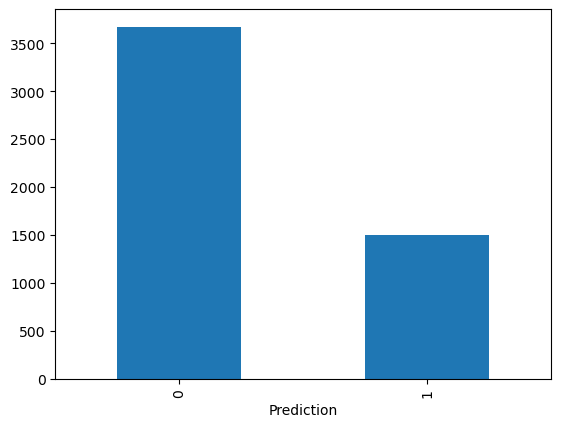

In [5]:
# Examine the features of the cleaned dataset.
features = cleaned_data.columns.tolist()
# Check if the dataset is balanced - spam message = 1; normal message = 0
cleaned_data.iloc[:, -1].value_counts().plot(kind='bar')

As we see can see by the bar plot the dataset is not balanced - 70% to 30% records in flavor of the non-spam emails 
according to the last column "Prediction".
To deal with this, we will later use a trainnig strategy where higher weights are assigned to the minority class during training
to give it more importance. Many models from the sklearn library support class weighting natively. Example: LogisticRegression(class_weight='balanced').

We will try to filter out the less important (common) words that have no impact on the end result (explained variable - spam/not) 
so that only the meaningful columns are used for the models training.
Two approaches are can be used here:
* Simpler one - tracking only the linear correlations via a correlation matrix calculation
* Computational expensive one - tracking the linear & non-linear corelations by using the sklearn's mutual_info_classif function.

The data in this dataset would most likely not have any "U" curves in the correlation functions - example: the hypothetical word "free" would have a linear relation to the "spam" status of an email, meaning - the bigger the counter of occurances of the word "free" - the higher the probability for the email to be a spam one. This forms a correlation in the form of straight line (linear relation). Same is expected for all other words.

Basing our future work on this idea, the simple linear corelation matrix should describe good enough data and we woudn't have to use the computational expensive method.

In [6]:
corr_matrix = cleaned_data.corr()
# Track the corelations to the "Prediction" column
prediction_corr = corr_matrix['Prediction']
prediction_corr

the          -0.004421
to            0.055277
ect          -0.120782
and           0.114364
for          -0.003101
                ...   
military      0.064850
allowing      0.011279
ff            0.135479
dry          -0.006260
Prediction    1.000000
Name: Prediction, Length: 3001, dtype: float64

In [7]:
# Function for selecting features that are above than threshold correlation with the "Prediction" value 
def feature_selector_correlation(cmatrix, threshold):
    selected_features = []
    feature_score = []
    i=0
    for score in cmatrix:
        if abs(score)>threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i+=1
    result = list(zip(selected_features,feature_score))
    return result
    
selected_features = feature_selector_correlation(prediction_corr, 0.1) # 0.1 used here by heuristic assumption
selected_features = [feature for feature in selected_features if feature[0] != 'Prediction']

print("Significant features that have a strong linear correlation with the Prediction column (spam or not) -",  len(selected_features), ":")
selected_features

Significant features that have a strong linear correlation with the Prediction column (spam or not) - 491 :


[('ect', ['-0.120782']),
 ('and', ['0.114364']),
 ('of', ['0.197234']),
 ('a', ['0.107776']),
 ('you', ['0.130293']),
 ('hou', ['-0.128340']),
 ('in', ['0.154055']),
 ('is', ['0.113277']),
 ('enron', ['-0.186740']),
 ('i', ['0.175059']),
 ('will', ['-0.111063']),
 ('with', ['0.124827']),
 ('your', ['0.186149']),
 ('s', ['0.134522']),
 ('it', ['0.173066']),
 ('gas', ['-0.156652']),
 ('deal', ['-0.190407']),
 ('meter', ['-0.166499']),
 ('hpl', ['-0.266518']),
 ('please', ['-0.162304']),
 ('re', ['0.151947']),
 ('our', ['0.228187']),
 ('corp', ['-0.115532']),
 ('d', ['0.124513']),
 ('know', ['-0.150099']),
 ('an', ['0.100678']),
 ('forwarded', ['-0.230765']),
 ('new', ['0.103438']),
 ('mmbtu', ['-0.157753']),
 ('should', ['-0.118703']),
 ('do', ['0.157434']),
 ('daren', ['-0.236180']),
 ('company', ['0.115922']),
 ('l', ['0.110256']),
 ('so', ['0.133126']),
 ('xls', ['-0.179113']),
 ('farmer', ['-0.194693']),
 ('attached', ['-0.236558']),
 ('us', ['0.173393']),
 ('day', ['-0.115398']),
 (

In [8]:
import pandas as pd
import plotly.io as pio
import plotly.express as px

# Set the default renderer for Plotly
pio.renderers.default = 'iframe'

# Convert selected features to a pandas Series for visualization
# Ensure feature names and scores are preserved
scores = pd.Series({item[0]: float(item[1][0]) for item in selected_features})

# Plot visualization
def plot_scores(scores, title="Feature Correlation Scores"):
    # Sort scores by absolute value in descending order
    scores = scores.sort_values(key=lambda x: x.abs(), ascending=False)
    
    # Prepare the data for visualization
    data = pd.DataFrame({
        'Feature': scores.index,  # Feature names
        'Score': scores.abs().values,  # Absolute values for display
        'Color': ['Positive' if score > 0 else 'Negative' for score in scores]  # Colors based on sign
    })

    # Create the bar plot
    fig = px.bar(
        data, 
        x='Score', 
        y='Feature', 
        color='Color',
        color_discrete_map={'Positive': 'green', 'Negative': 'red'},
        orientation='h',
        title=title,
        labels={'Score': 'Absolute Correlation Score', 'Feature': 'Features'}
    )

    # Customize layout
    fig.update_layout(
        yaxis=dict(
            categoryorder='total ascending',  # Highest scores on top
        ),
        height=500,  # Adjust the height if needed
        margin=dict(l=100, t=50),  # Adjust margin
        showlegend=True
    )

    fig.show()

# Call the function to plot
plot_scores(scores)

With the selected features cleared out, we can now construct the training and validation data objects
in an appropriate format for the training of the models

In [9]:
X = cleaned_data[scores.index] # scores.index returns the names of all selected features
Y = cleaned_data['Prediction']
# transform the dataset in appropriate format for model training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=41)

# Without scaling, features with larger value ranges might dominate the model,
# while features with smaller value ranges might be ignored.
# By scaling, all features receive equal opportunity to influence the model.
scaler = StandardScaler()
# The test data is scaled using the mean and standard deviation derived from the training set via the fit command.
X_train_scaled = scaler.fit_transform(X_train)
# On the test set only the transform operation is used. The scaling parameters from the fit operation are already calculated on the X_train_scaled.
X_test_scaled = scaler.transform(X_test)



Lets select and set up the different models that we want to train. For this part, some predefined models from the Scikit-learn library are used.

In [10]:
# Import the models Naive Bayes, KNN, LogisticRegression, RandomForestClassifier, MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Initiate the models
classifiers = {
    'Logistic Regression': LogisticRegression(verbose=True, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(verbose=True, class_weight='balanced'),
    'Support Vector Machines (SVM)': SVC(verbose=True, class_weight='balanced'),
    # The models below don't natively support the usage of class_weight='balanced' parameter so we'll use a workaround in the next code cell
    'Naive Bayes': GaussianNB(),  # Use sample weights during fit
    'KNN': KNeighborsClassifier(),  # Use SMOTE
    'MLP Classifier': MLPClassifier(verbose=True),  # Use SMOTE
    'Gradient Boosting': GradientBoostingClassifier(verbose=True)  # Use sample weights during fit

}
# Set different hyperparameter configurations for each model so that the best is picked up by GridSearchCV
param_grids = {
    'Naive Bayes': {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'p': [1, 2, 3]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20]
    },
    'MLP Classifier': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'max_iter': [500, 1000],
        'learning_rate_init': [0.001, 0.0005],
        'early_stopping': [True]
    },
    'Support Vector Machines (SVM)': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

In [11]:
# Execute the model training with included workarounds the models with non-native class balancing mechanisms

from sklearn.utils.class_weight import compute_sample_weight
from imblearn.over_sampling import SMOTE

# Adjust weights for unsupported models by re-sampling or using sample weights
def preprocess_for_imbalance(X, y, method='smote'):
    if method == 'smote':
        sm = SMOTE(random_state=42)
        X_resampled, y_resampled = sm.fit_resample(X, y)
        return X_resampled, y_resampled
    elif method == 'sample_weight':
        sample_weights = compute_sample_weight('balanced', y)
        return X, y, sample_weights
    else:
        raise ValueError("Unsupported method. Use 'smote' or 'sample_weight'.")

trained_models = {}
training_times = {}  # Dictionary to store training times

# GridSearchCV with sample weights for unsupported models
def perform_grid_search_with_weights(classifiers, param_grids, X_train, y_train):
    for name, model in classifiers.items():
        model_start_time = datetime.now()
        print(f"{name} training started at: {model_start_time.strftime('%H:%M:%S')}")
        if name in ['Naive Bayes', 'Gradient Boosting']:
            # Compute sample weights
            sample_weights = compute_sample_weight('balanced', y_train)
            grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, verbose=1, n_jobs=-1, scoring='accuracy')
            grid_search.fit(X_train, y_train, sample_weight=sample_weights)
        elif name in ['KNN', 'MLP Classifier']:
            # Use SMOTE for these models
            X_resampled, y_resampled = preprocess_for_imbalance(X_train, y_train, method='smote')
            grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, verbose=1, n_jobs=-1, scoring='accuracy')
            grid_search.fit(X_resampled, y_resampled)
        else:
            # Directly use class_weight='balanced'
            grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, verbose=1, n_jobs=-1, scoring='accuracy')
            grid_search.fit(X_train, y_train)
        trained_models[name] = grid_search
        model_end_time = datetime.now()
        print(f"{name} training finished at: {model_end_time.strftime('%H:%M:%S')}")
        
        # Calculate and store training time
        duration = (model_end_time - model_start_time).total_seconds()
        training_times[name] = duration
    return trained_models, training_times

start_time = datetime.now()
print(f"Training started at: {start_time.strftime('%H:%M:%S')}")
perform_grid_search_with_weights(classifiers, param_grids, X_train, Y_train)
end_time = datetime.now()
print(f"Training finished at: {end_time.strftime('%H:%M:%S')}")

Training started at: 23:09:22
Logistic Regression training started at: 23:09:22
Fitting 5 folds for each of 3 candidates, totalling 15 fits


E:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression training finished at: 23:09:29
Random Forest training started at: 23:09:29
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.5s


Random Forest training finished at: 23:09:58
Support Vector Machines (SVM) training started at: 23:09:58
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[LibSVM]Support Vector Machines (SVM) training finished at: 23:12:47
Naive Bayes training started at: 23:12:47
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Naive Bayes training finished at: 23:12:47
KNN training started at: 23:12:47
Fitting 5 folds for each of 15 candidates, totalling 75 fits
KNN training finished at: 23:15:38
MLP Classifier training started at: 23:15:38
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Iteration 1, loss = 0.52455528
Validation score: 0.864130
Iteration 2, loss = 0.30250813
Validation score: 0.918478
Iteration 3, loss = 0.21904799
Validation score: 0.920290
Iteration 4, loss = 0.18043684
Validation score: 0.918478
Iteration 5, loss = 0.14658227
Validation score: 0.942029
Iteration 6, loss = 0.12298526
Validation score: 0.956522
Iteration 7, loss = 0.10796096
Vali

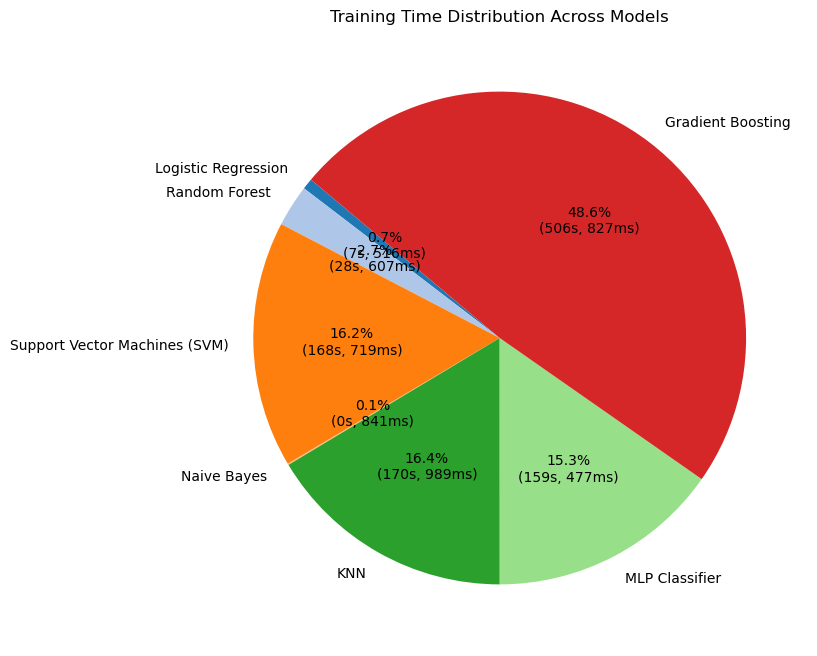

In [12]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
labels = training_times.keys()
values = training_times.values()

def autopct_format(pct, all_values):
    total = sum(all_values)
    raw_value = pct * total / 100
    seconds = int(raw_value)  # Extract seconds
    milliseconds = int((raw_value - seconds) * 1000)  # Extract milliseconds
    return f"{pct:.1f}%\n({seconds}s, {milliseconds}ms)"

plt.pie(values, labels=labels, autopct=lambda pct: autopct_format(pct, values), startangle=140, colors=plt.cm.tab20.colors)
plt.title("Training Time Distribution Across Models")
plt.show()

In [22]:
# Print the training results for each model using the appropriate scaling configurations
for name, grid_search in trained_models.items():
    print(f"{name}:")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    
    best_model = grid_search.best_estimator_
    
    # Apply the correct scaling configuration before testing
    if name in ['Naive Bayes', 'Gradient Boosting']:
        sample_weights = compute_sample_weight('balanced', Y_test)
        Y_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(Y_test, Y_pred, sample_weight=sample_weights)
    else:
        Y_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(Y_test, Y_pred)

    print("Test Accuracy:", test_accuracy)
    print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
    print("Classification Report:\n", classification_report(Y_test, Y_pred))
    print()

Logistic Regression:
Best Parameters: {'C': 10}
Best Score: 0.9399371466577984
Test Accuracy: 0.954369682907966
Confusion Matrix:
 [[872  43]
 [ 16 362]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       915
           1       0.89      0.96      0.92       378

    accuracy                           0.95      1293
   macro avg       0.94      0.96      0.95      1293
weighted avg       0.96      0.95      0.95      1293


Random Forest:
Best Parameters: {'max_depth': None, 'n_estimators': 300}
Best Score: 0.9657130029930163
Test Accuracy: 0.9659706109822119
Confusion Matrix:
 [[893  22]
 [ 22 356]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       915
           1       0.94      0.94      0.94       378

    accuracy                           0.97      1293
   macro avg       0.96      0.96      0.96      1293
weighted avg      

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Test Accuracy: 0.9597834493426141
Confusion Matrix:
 [[890  25]
 [ 27 351]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       915
           1       0.93      0.93      0.93       378

    accuracy                           0.96      1293
   macro avg       0.95      0.95      0.95      1293
weighted avg       0.96      0.96      0.96      1293


Naive Bayes:
Best Parameters: {'var_smoothing': 1e-09}
Best Score: 0.8966192218157631
Test Accuracy: 0.8287882730505681
Confusion Matrix:
 [[897  18]
 [122 256]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       915
           1       0.93      0.68      0.79       378

    accuracy                           0.89      1293
   macro avg       0.91      0.83      0.86      1293
weighted avg       0.90      0.89      0.89      1293


KNN:
Best Parameters: {'n_neighbors': 3, 'p': 3}
Best Scor

In [14]:
# Print the best version of each model type + the hyperparameters that achieve it
print("Summary of Best Models:")
for name, grid_search in trained_models.items():
    print(f"{name}:")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score (CV):", grid_search.best_score_)
    print()

Summary of Best Models:
Logistic Regression:
Best Parameters: {'C': 10}
Best Score (CV): 0.9399371466577984

Random Forest:
Best Parameters: {'max_depth': None, 'n_estimators': 300}
Best Score (CV): 0.9657130029930163

Support Vector Machines (SVM):
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score (CV): 0.9468955769870302

Naive Bayes:
Best Parameters: {'var_smoothing': 1e-09}
Best Score (CV): 0.8966192218157631

KNN:
Best Parameters: {'n_neighbors': 3, 'p': 3}
Best Score (CV): 0.8387774309629077

MLP Classifier:
Best Parameters: {'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'}
Best Score (CV): 0.9695341693089133

Gradient Boosting:
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Best Score (CV): 0.9667445959428



Recap for the Logistic Regression model:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       915
           1       0.89      0.96      0.92       378

    accuracy                           0.95      1293
   macro avg       0.94      0.96      0.95      1293
weighted avg       0.96      0.95      0.95      1293

Precision: 0.96
Recall: 0.95
F1 Score: 0.95
Accuracy: 0.95


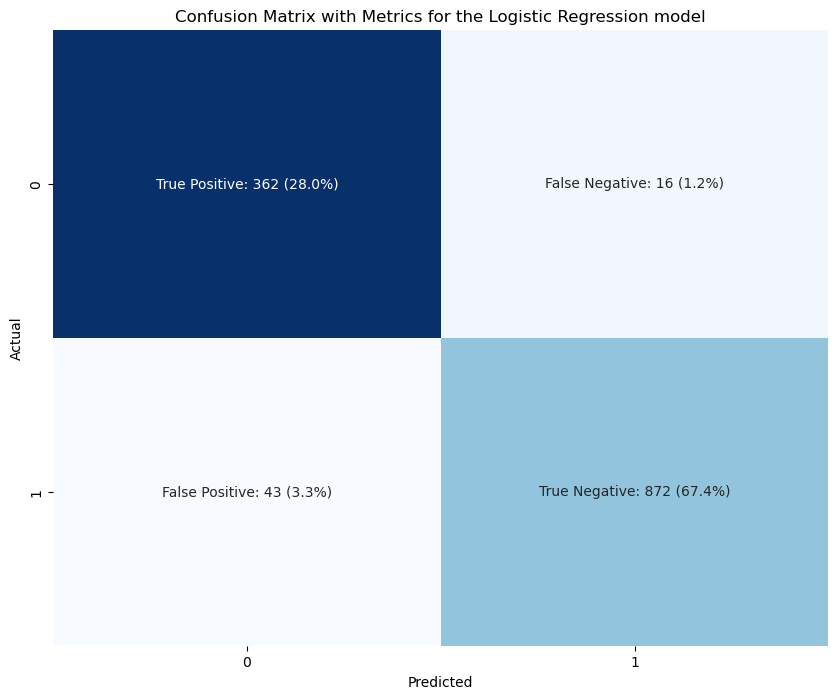


Recap for the Random Forest model:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       915
           1       0.94      0.94      0.94       378

    accuracy                           0.97      1293
   macro avg       0.96      0.96      0.96      1293
weighted avg       0.97      0.97      0.97      1293

Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Accuracy: 0.97


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


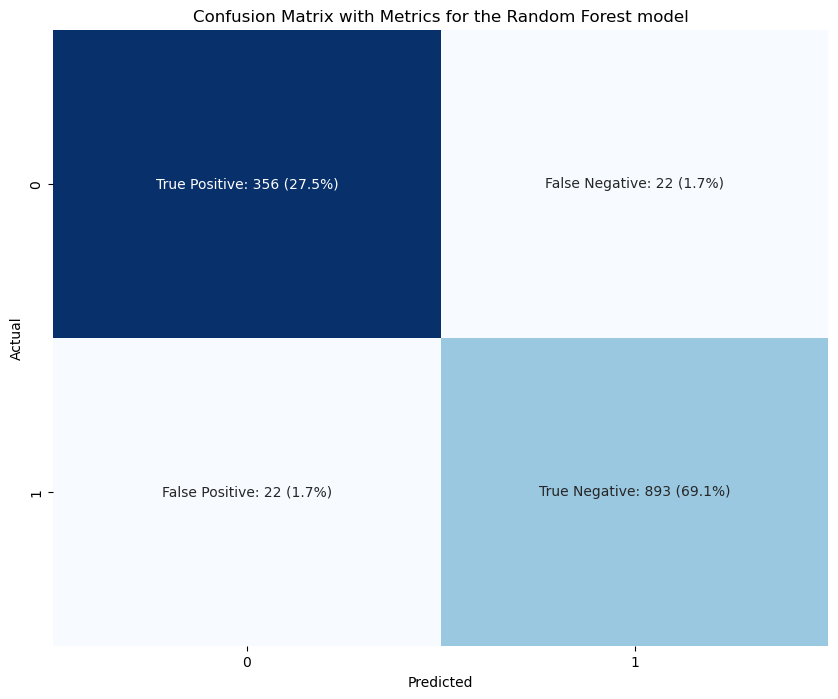


Recap for the Support Vector Machines (SVM) model:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       915
           1       0.93      0.93      0.93       378

    accuracy                           0.96      1293
   macro avg       0.95      0.95      0.95      1293
weighted avg       0.96      0.96      0.96      1293

Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Accuracy: 0.96


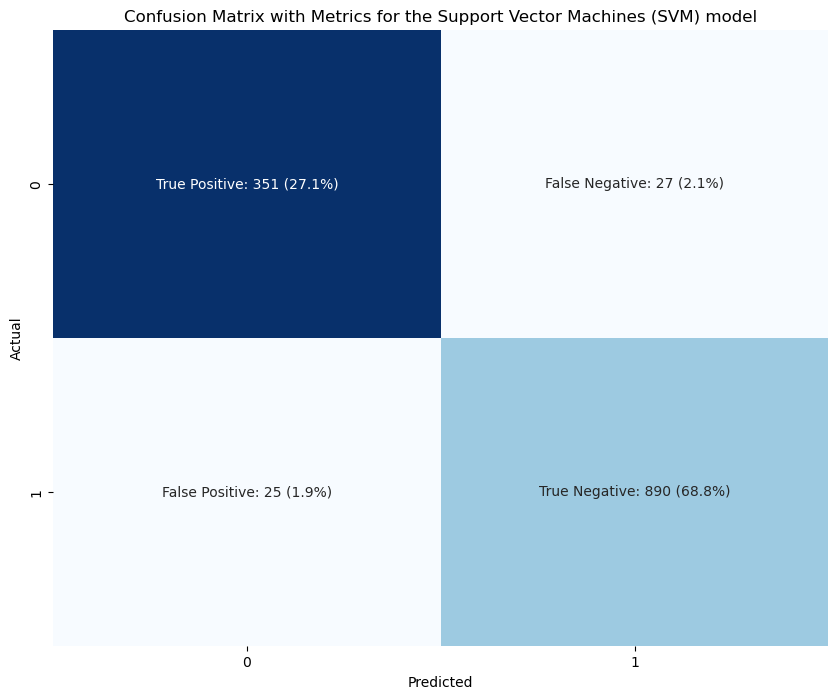


Recap for the Naive Bayes model:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       915
           1       0.93      0.68      0.79       378

    accuracy                           0.89      1293
   macro avg       0.91      0.83      0.86      1293
weighted avg       0.90      0.89      0.89      1293

Precision: 0.90
Recall: 0.89
F1 Score: 0.89
Accuracy: 0.89


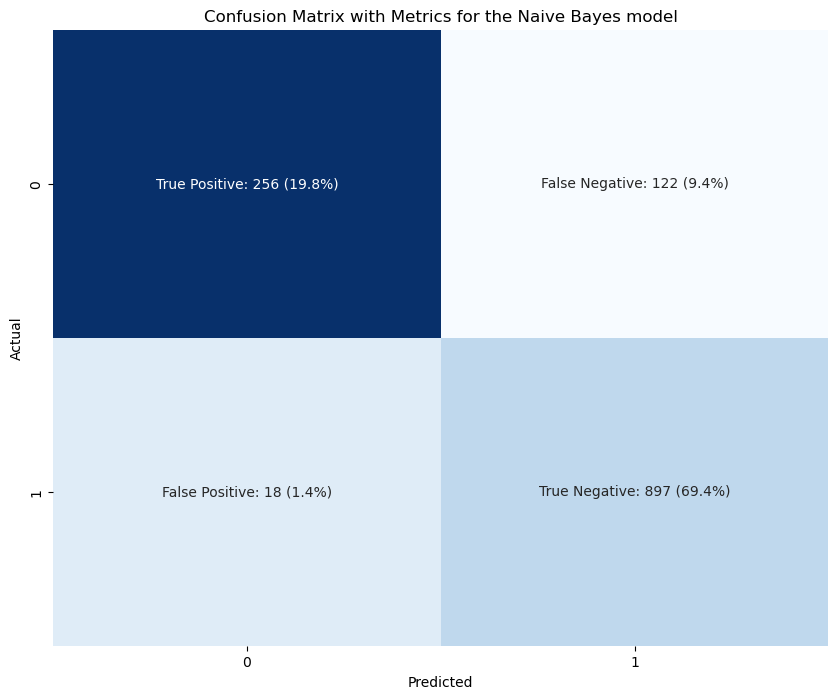


Recap for the KNN model:
               precision    recall  f1-score   support

           0       0.93      0.72      0.81       915
           1       0.56      0.88      0.69       378

    accuracy                           0.77      1293
   macro avg       0.75      0.80      0.75      1293
weighted avg       0.83      0.77      0.78      1293

Precision: 0.83
Recall: 0.77
F1 Score: 0.78
Accuracy: 0.77


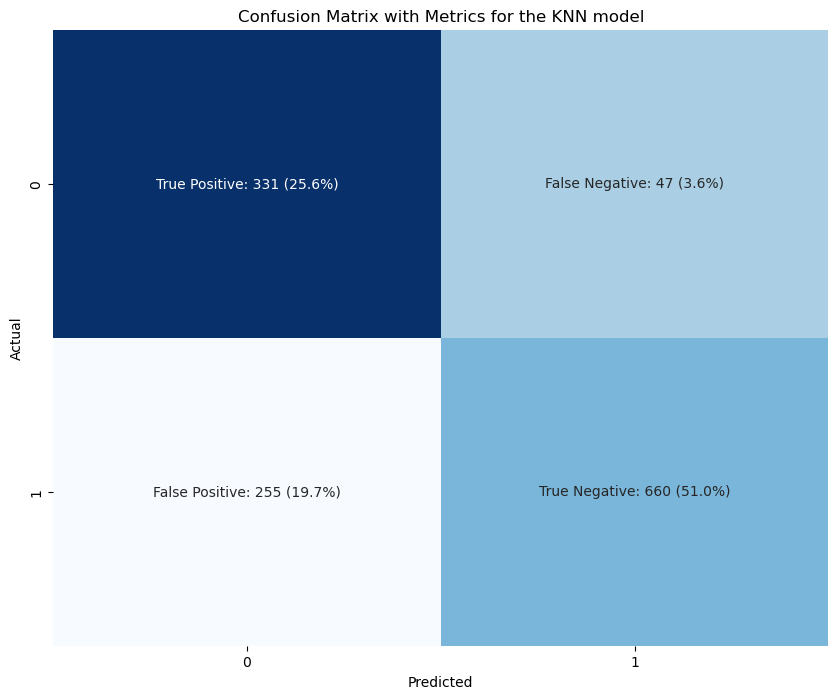


Recap for the MLP Classifier model:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       915
           1       0.95      0.95      0.95       378

    accuracy                           0.97      1293
   macro avg       0.96      0.97      0.96      1293
weighted avg       0.97      0.97      0.97      1293

Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Accuracy: 0.97


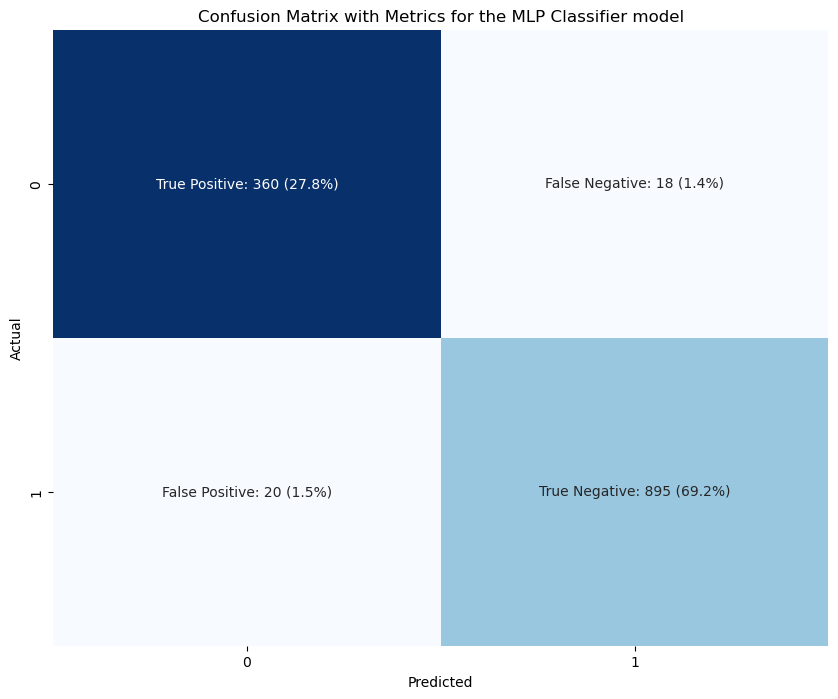


Recap for the Gradient Boosting model:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       915
           1       0.94      0.98      0.96       378

    accuracy                           0.98      1293
   macro avg       0.97      0.98      0.97      1293
weighted avg       0.98      0.98      0.98      1293

Precision: 0.98
Recall: 0.98
F1 Score: 0.98
Accuracy: 0.98


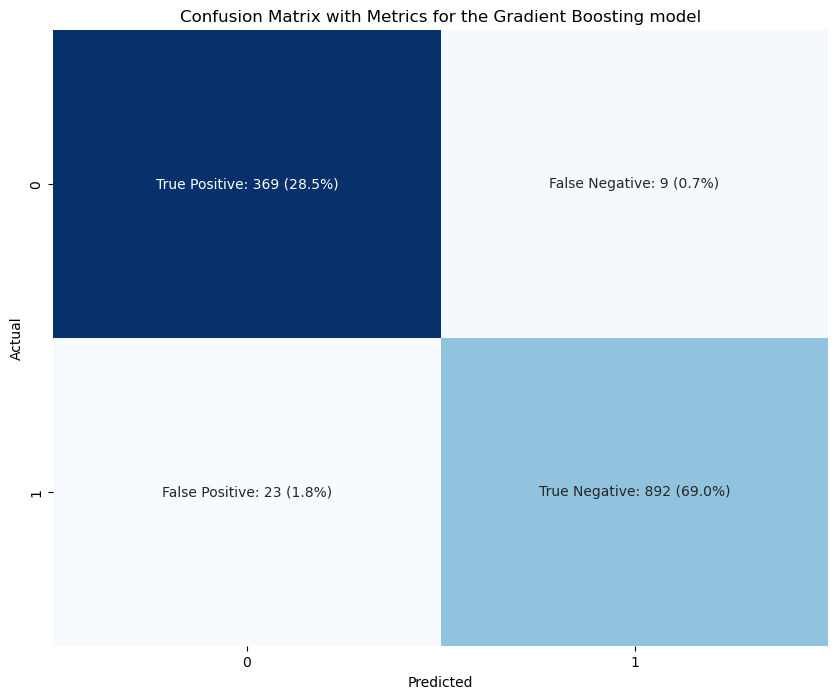

In [25]:
# Visualise the confusion matrix + stats for each model type
for name, grid_search in trained_models.items():
    
 # Apply the correct scaling configuration before testing
    if name in ['Naive Bayes', 'Gradient Boosting']:
        sample_weights = compute_sample_weight('balanced', Y_test)
        Y_pred = grid_search.best_estimator_.predict(X_test)
        test_accuracy = accuracy_score(Y_test, Y_pred, sample_weight=sample_weights)
    else:
        Y_pred = grid_search.best_estimator_.predict(X_test)
        test_accuracy = accuracy_score(Y_test, Y_pred)


    print("Recap for the " + name + " model:\n", classification_report(Y_test, Y_pred))
    
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred, output_dict=True)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    
    annotations = np.empty_like(conf_matrix, dtype=object)
    total = conf_matrix.sum()
    tn, fp, fn, tp = conf_matrix.ravel()
    annotations[0, 0] = f"True Positive: {tp} ({tp / total * 100:.1f}%)"
    annotations[1, 0] = f"False Positive: {fp} ({fp / total * 100:.1f}%)"
    annotations[0, 1] = f"False Negative: {fn} ({fn / total * 100:.1f}%)"
    annotations[1, 1] = f"True Negative: {tn} ({tn / total * 100:.1f}%)"

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=annotations, fmt="", cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix with Metrics for the ' + name + " model")
    plt.show()
    print()

In [20]:
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

print(f"Performing {k}-Fold Cross-Validation with Resampling...\n")

cv_results = {}

for name, grid_search in trained_models.items():
    model = grid_search.best_estimator_  # Get the best trained model
    
    scores = []
    
    for train_idx, test_idx in skf.split(X, Y):
        X_train_fold, X_test_fold = X_train, X_test
        Y_train_fold, Y_test_fold = Y_train, Y_test
        
        if name in ['Naive Bayes', 'Gradient Boosting']:
            # Compute sample weights
            sample_weights = compute_sample_weight('balanced', Y_train_fold)
            model.fit(X_train_fold, Y_train_fold, sample_weight=sample_weights)
        elif name in ['KNN', 'MLP Classifier']:
            # Use SMOTE within each fold
            sm = SMOTE(random_state=42)
            X_train_resampled, Y_train_resampled = sm.fit_resample(X_train_fold, Y_train_fold)
            model.fit(X_train_resampled, Y_train_resampled)
        else:
            # Train normally without additional weighting
            model.fit(X_train_fold, Y_train_fold)
        
        score = model.score(X_test_fold, Y_test_fold)
        scores.append(score)

    mean_score = np.mean(scores)
    std_score = np.std(scores)
    
    cv_results[name] = {
        'Mean Accuracy': mean_score,
        'Standard Deviation': std_score
    }
    
    print(f"{name} Model:")
    print(f"Accuracy Scores: {scores}")
    print(f"Mean Accuracy: {mean_score:.4f}")
    print(f"Standard Deviation: {std_score:.4f}")
    print("\n" + "-"*50 + "\n")

# Convert results into a DataFrame for better visualization
cv_df = pd.DataFrame(cv_results).T
display(cv_df)

Performing 10-Fold Cross-Validation with Resampling...



E:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

E:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

E:\Anaconda\envs\tf-gpu\lib\site-packages\sk

Logistic Regression Model:
Accuracy Scores: [0.954369682907966, 0.954369682907966, 0.954369682907966, 0.954369682907966, 0.954369682907966, 0.954369682907966, 0.954369682907966, 0.954369682907966, 0.954369682907966, 0.954369682907966]
Mean Accuracy: 0.9544
Standard Deviation: 0.0000

--------------------------------------------------



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Random Forest Model:
Accuracy Scores: [0.9698375870069605, 0.9690641918020109, 0.9644238205723125, 0.9682907965970611, 0.9636504253673627, 0.9721577726218097, 0.9667440061871616, 0.9667440061871616, 0.9644238205723125, 0.9659706109822119]
Mean Accuracy: 0.9671
Standard Deviation: 0.0026

--------------------------------------------------

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Support Vector Machines (SVM) Model:
Accuracy Scores: [0.9597834493426141, 0.9597834493426141, 0.9597834493426141, 0.9597834493426141, 0.9597834493426141, 0.9597834493426141, 0.9597834493426141, 0.9597834493426141, 0.9597834493426141, 0.9597834493426141]
Mean Accuracy: 0.9598
Standard Deviation: 0.0000

--------------------------------------------------

Naive Bayes Model:
Accuracy Scores: [0.8917246713070379, 0.8917246713070379, 0.8917246713070379, 0.8917246713070379, 0.8917246713070379, 0.8917246713070379, 0.8917246713070379, 0.8917246713070379, 0.8917246713070379, 0.891

,Mean Accuracy,Standard Deviation
Logistic Regression,0.954370,1.110223e-16
Random Forest,0.967131,2.570885e-03
Support Vector Machines (SVM),0.959783,1.110223e-16
Naive Bayes,0.891725,1.110223e-16
KNN,0.766435,1.110223e-16
MLP Classifier,0.967827,4.267011e-03
Gradient Boosting,0.975251,1.110223e-16


As seen from this table, the K-Fold validation matches with great precision the results from the basic validation using the dataset in the previous cell.

From those 2 independent validation, we can conclude that the results are real for sure.

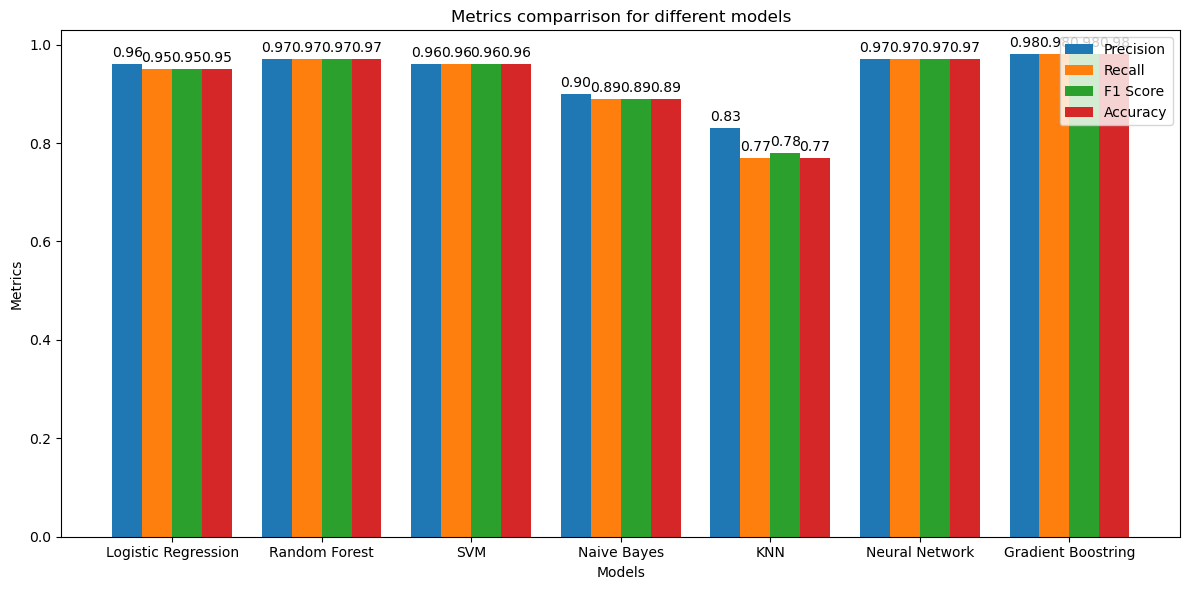

In [27]:
# Compare the models in one merged bar plot
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes', 'KNN', 'Neural Network', 'Gradient Boostring']
precision = [0.96, 0.97, 0.96, 0.90, 0.83, 0.97, 0.98]
recall = [0.95, 0.97, 0.96, 0.89, 0.77, 0.97, 0.98]
f1_score = [0.95, 0.97, 0.96, 0.89, 0.78, 0.97, 0.98]
accuracy = [0.95, 0.97, 0.96, 0.89, 0.77, 0.97, 0.98]

x = np.arange(len(models))  
width = 0.2  

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width*1.5, precision, width, label='Precision')
rects2 = ax.bar(x - width/2, recall, width, label='Recall')
rects3 = ax.bar(x + width/2, f1_score, width, label='F1 Score')
rects4 = ax.bar(x + width*1.5, accuracy, width, label='Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Metrics')
ax.set_title('Metrics comparrison for different models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

***Summary***

1. Logistic Regression
* Performance: High accuracy (95%) with strong precision (96%) and recall (95%).
* Training Time: Very fast (7s).
* Pros: Efficient and interpretable. Well-suited for high-dimensional data.
* Cons: Assumes linear separability, which may not always hold but works fine in our case.
2. Random Forest
* Performance: Excellent performance (97% accuracy, precision, recall, F1-score).
* Training Time: Moderate (28s).
* Pros: Handles non-linearity well, robust to overfitting.
* Cons: Less interpretable than Logistic Regression.
3. Support Vector Machine (SVM)
* Performance: Strong (96% across all metrics).
* Training Time: Very slow (168s).
* Pros: Effective for complex decision boundaries.
* Cons: Computationally expensive for large datasets.
4. Naïve Bayes
* Performance: Decent but lower than others (89% accuracy, 90% precision).
* Training Time: Extremely fast (1s).
* Pros: Simple, scalable and extremely fast. Good for text classification.
* Cons: Assumes feature independence, limiting accuracy.
5. k-Nearest Neighbors (kNN)
* Performance: Weakest performer (77% accuracy, 83% precision).
* Training Time: Very slow (170s).
* Pros: Simple, non-parametric.
* Cons: Computationally expensive, especially with high-dimensional data. Bad results due to overfitting because of the high number of features in our case.
6. Neural Network
* Performance: Strong (97% accuracy, precision, recall).
* Training Time: Slow (160s).
* Pros: Good for complex patterns, scalable.
* Cons: Requires tuning and long training time.
7. Gradient Boosting
* Performance: Best overall (98% accuracy, precision, recall).
* Training Time: Very slow (506s).
* Pros: Extremely powerful, excels at capturing patterns.
* Cons: Computationally intensive, requires hyperparameter tuning.

***Overall Recommendations***
* For quick, efficient training: Logistic Regression or Naïve Bayes.
* For balanced performance & speed: Random Forest.
* For best accuracy: Gradient Boosting (if time is not an issue).
* For non-linear relationships: SVM or Neural Networks (if resources allow).
* Avoid kNN due to poor scalability and performance.